In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#from random import shuffle
import glob
import re
import h5py
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split 
import pandas as pd
from tensorflow.keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import regularizers
np.set_printoptions(precision=3, suppress=True) #Make numpy easier to read

In [3]:
os.chdir("/content/drive/My Drive/DeplomadoDeepLearning/Gomez_Saul/Proyecto/")


In [4]:
ls

'Copia de ImageClasification_algorithm (1).ipynb'
'Copia de ImageClasification_algorithm.ipynb'
 DataAugmentationOneClass.ipynb
 DataBase/
 ImageClasification_algorithm.ipynb
 ImageSplitManyClasses.ipynb
 MLP_Clasificador_algorithm.ipynb
 my_model2.h5
 my_model.h5
 OriginalDataBase/
 Untitled0.ipynb
 vgg16_block3_ImageClasification_algorithm.ipynb
'VGG16_block4_ ImageClasification_algorithm.ipynb'
' VGG16_ ImageClasification_algorithm.ipynb'


In [5]:
train_path = "//content/drive/My Drive/DeplomadoDeepLearning/Gomez_Saul/Proyecto/DataBase/train"
validation_path = "//content/drive/My Drive/DeplomadoDeepLearning/Gomez_Saul/Proyecto/DataBase/validation"


In [6]:
def trainFileCount(train_path):
  total_file_training= 0;
  basename ='';
  for root, dirnames, filenames in os.walk(train_path):
    for dirname in dirnames:
      directory_training = os.path.join(train_path, dirname) 
      directory_training = directory_training + os.sep
      num_file_training = len(os.listdir(directory_training))
      total_file_training = total_file_training + num_file_training
      basename = os.path.basename(train_path)
      print('total',basename, dirname,' images:',num_file_training)
  print('Total', basename,' images:',total_file_training)
  print('-------------------------------------------------------')


In [7]:
total_train_img = trainFileCount(train_path)
total_Validation_img = trainFileCount(validation_path)


total train Ptosis  images: 1054
total train Ectropion  images: 482
total train Chalazion  images: 218
total train Triquiasis  images: 163
total train TumorParpado  images: 368
total train BlefaroChalasis  images: 581
total train Blefaritis  images: 132
total train Xanthelasma  images: 184
Total train  images: 3182
-------------------------------------------------------
total validation Ptosis  images: 264
total validation Ectropion  images: 121
total validation Chalazion  images: 55
total validation Triquiasis  images: 41
total validation TumorParpado  images: 92
total validation BlefaroChalasis  images: 146
total validation Blefaritis  images: 33
total validation Xanthelasma  images: 46
Total validation  images: 798
-------------------------------------------------------


In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [9]:
img = cv2.imread('/content/drive/My Drive/DeplomadoDeepLearning/Gomez_Saul/Proyecto/DataBase/train/Blefaritis/1.png')
img.shape

(164, 164, 3)

In [10]:
batch_size = 32
epochs = 50
IMG_SHAPE = 164

In [11]:
image_generator_train = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=15,
                    width_shift_range=.005, 
                    height_shift_range=.005, 
                    horizontal_flip=True, 
                    zoom_range=0.3
                    )


In [12]:
image_generator_validation = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=20, 
                    width_shift_range=.01, 
                    height_shift_range=.01, 
                    horizontal_flip=True, 
                    zoom_range=0.3
                    )

In [13]:
train_data_generator = image_generator_train.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=train_path, 
                                                shuffle=True, 
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                )

Found 3182 images belonging to 8 classes.


In [14]:
Validation_data_generator = image_generator_validation.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=validation_path, 
                                                shuffle=False, 
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                )

Found 798 images belonging to 8 classes.


In [15]:
augmented_images = [train_data_generator[0][0][1] for i in range(5)]

In [16]:
sample_training_images, _ = next(train_data_generator) 
sample_training_images.shape

(32, 164, 164, 3)

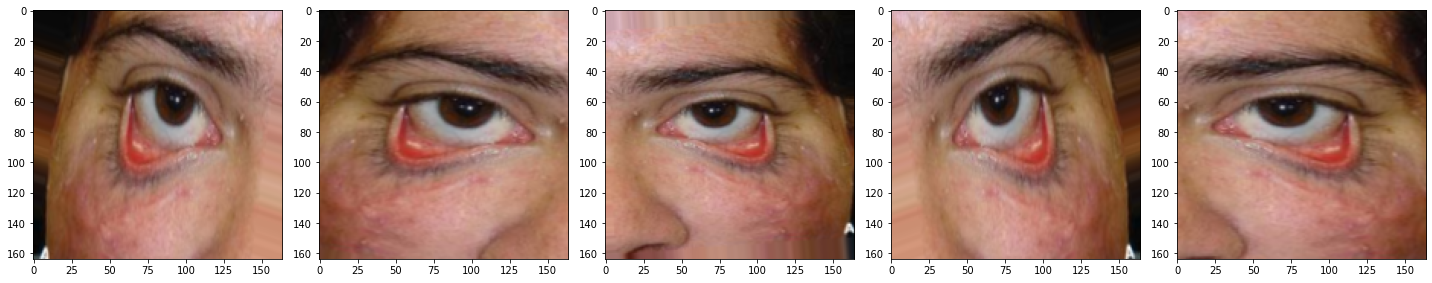

In [17]:
plotImages(augmented_images[:5])

In [18]:
# Herramienta para ver el comportamiento del entrenamiento
def plot_train_performance(train_data):
    acc = train_data.history['accuracy']
    val_acc = train_data.history['val_accuracy']
    loss = train_data.history['loss']
    val_loss = train_data.history['val_loss']

    epochs = range(1,len(acc)+1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

In [19]:
# Funcion para comparar las predicciónes
import numpy as np
def show_pred(test_ds):
    to_predict_data = test_ds.batch(1).take(9)
    results = np.argmax(model.predict(to_predict_data),axis=1)

    import matplotlib.pyplot as plt # A continuación se muestra un ejemplo con su etiqueta
    fig = plt.figure(figsize=(20,20))
    for i, (image, label) in enumerate(to_predict_data):
      res_plt = fig.add_subplot(3, 3, i+1)
      res_plt.set_title(classes_dict[int(np.squeeze(label.numpy()))])
      predicted_lbl = "Predicted: " + classes_dict[results[i]]
      res_plt.set_xlabel(predicted_lbl)
      plt.imshow(np.squeeze(image.numpy()*255).astype(np.uint8))
    plt.show()

In [20]:
model = Sequential()
model.add(Conv2D(60, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3,))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(480, 3, padding='same', activation='relu'))
model.add(Conv2D(480, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(800, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 164, 164, 60)      1680      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 82, 82, 60)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 480)       259680    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 480)       2074080   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 480)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 800)       3456800   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 800)       0

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resume = model.fit(train_data_generator, 
                   validation_data=Validation_data_generator,
                   epochs=epochs)
model.save('my_model.h5') 

Epoch 1/50
100/100 [==============================] - 111s 1s/step - loss: 1.9319 - accuracy: 0.2910 - val_loss: 1.8758 - val_accuracy: 0.3308
Epoch 2/50
100/100 [==============================] - 100s 1s/step - loss: 1.9148 - accuracy: 0.2894 - val_loss: 1.8277 - val_accuracy: 0.3308
Epoch 3/50
100/100 [==============================] - 101s 1s/step - loss: 1.9025 - accuracy: 0.3055 - val_loss: 1.8476 - val_accuracy: 0.3308
Epoch 4/50
100/100 [==============================] - 101s 1s/step - loss: 1.8914 - accuracy: 0.2964 - val_loss: 1.8423 - val_accuracy: 0.3484
Epoch 5/50
100/100 [==============================] - 101s 1s/step - loss: 1.8475 - accuracy: 0.3124 - val_loss: 1.7570 - val_accuracy: 0.3459
Epoch 6/50
100/100 [==============================] - 102s 1s/step - loss: 1.8059 - accuracy: 0.3212 - val_loss: 1.7229 - val_accuracy: 0.3609
Epoch 7/50
100/100 [==============================] - 102s 1s/step - loss: 1.7629 - accuracy: 0.3460 - val_loss: 1.6940 - val_accuracy: 0.3647

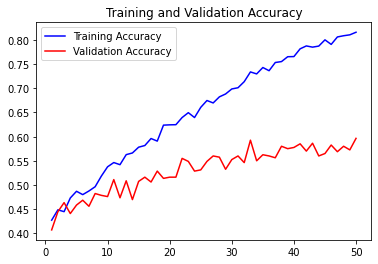

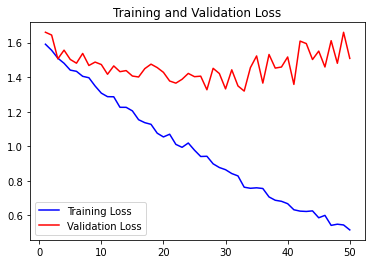

In [28]:
plot_train_performance(resume)

In [25]:
new_model = tf.keras.models.load_model('my_model.h5')
new_model.trainable = True
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 164, 164, 60)      1680      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 82, 82, 60)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 480)       259680    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 480)       2074080   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 480)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 800)       3456800   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 800)       0

In [26]:
new_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resume = new_model.fit(train_data_generator, 
                   validation_data=Validation_data_generator,
                   epochs=epochs)
model.save('my_model2.h5') 

Epoch 1/50
100/100 [==============================] - 102s 1s/step - loss: 1.5907 - accuracy: 0.4274 - val_loss: 1.6600 - val_accuracy: 0.4073
Epoch 2/50
100/100 [==============================] - 101s 1s/step - loss: 1.5555 - accuracy: 0.4488 - val_loss: 1.6438 - val_accuracy: 0.4449
Epoch 3/50
100/100 [==============================] - 101s 1s/step - loss: 1.5098 - accuracy: 0.4450 - val_loss: 1.5060 - val_accuracy: 0.4637
Epoch 4/50
100/100 [==============================] - 101s 1s/step - loss: 1.4804 - accuracy: 0.4733 - val_loss: 1.5562 - val_accuracy: 0.4411
Epoch 5/50
100/100 [==============================] - 101s 1s/step - loss: 1.4407 - accuracy: 0.4871 - val_loss: 1.5025 - val_accuracy: 0.4586
Epoch 6/50
100/100 [==============================] - 101s 1s/step - loss: 1.4337 - accuracy: 0.4802 - val_loss: 1.4808 - val_accuracy: 0.4687
Epoch 7/50
100/100 [==============================] - 101s 1s/step - loss: 1.4048 - accuracy: 0.4877 - val_loss: 1.5373 - val_accuracy: 0.4561

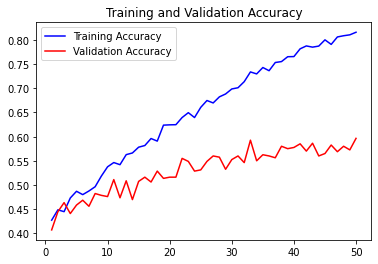

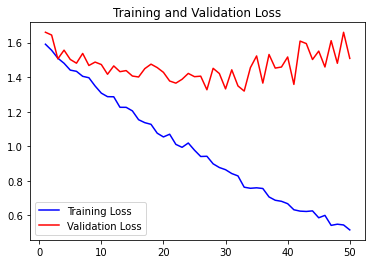

In [27]:
plot_train_performance(resume)